In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob, os
import scipy.io as sio
from scipy.signal import savgol_filter
import random
from pyaldata import *
import matplotlib
from ipywidgets import interact


In [2]:
data_dir_model = '/home/cf620/git/prep_center_out/simulation/results/100022/4/'


In [3]:
fname = os.path.join(data_dir_model, "pydata.mat")

df = mat2dataframe(fname, shift_idx_fields=True)

## Behaviour similarity between Monkey and RNNs 

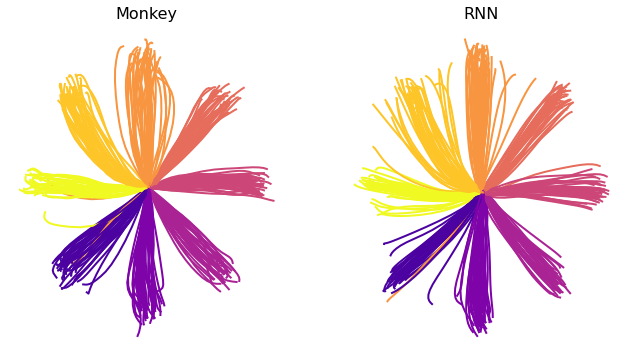

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))

cmap = matplotlib.cm.get_cmap('plasma')

for i in df.index:

    pos_bin_x = df.loc[i,'target_output'][:,0]*0.03
    pos_bin_y = df.loc[i,'target_output'][:,1]*0.03
    output_posx = np.cumsum(pos_bin_x)
    output_posy = np.cumsum(pos_bin_y)
    ax1.plot(output_posx,output_posy, c = cmap((df.loc[i,'labels']+1)/8),
                linestyle = '-', linewidth = 2, marker = None)

    pos_bin_x = df.loc[i,'pos'][:,0]*0.03
    pos_bin_y = df.loc[i,'pos'][:,1]*0.03
    output_posx = np.cumsum(pos_bin_x)
    output_posy = np.cumsum(pos_bin_y)
    ax2.plot(output_posx,output_posy, c = cmap((df.loc[i,'labels']+1)/8),
                linestyle = '-', linewidth = 2, marker = None)
    
ax1.axis('off')
ax1.set_title('Monkey', fontsize=16)
ax2.axis('off')
ax2.set_title('RNN', fontsize=16)

plt.savefig('/home/cf620/Documents/curved_manifold/plots/standard_model_pos.pdf')

## Manifold similarity

In [5]:
from sklearn.decomposition import PCA


In [6]:
n_pcs = 3

In [7]:
df.head()

,session,target_id,trial_id,bin_size,idx_trial_start,idx_target_on,idx_go_cue,idx_trial_end,MCx_rates,pos,target_output,labels,labels
0,init,NaN,0,0.01,-1,1,6,21,"[[0.016231926, -0.0027168097, -0.053204823, 0....","[[0.07233287, -0.46338984], [0.03618145, -0.58...","[[0.20794888130572733, -0.32105447699249906], ...",NaN,2.0
1,init,NaN,1,0.01,-1,1,6,21,"[[0.010386164, 0.077510156, -0.04713181, 0.031...","[[0.18922329, -0.72090346], [0.17696989, -0.83...","[[-0.5025897137103396, -0.5413751500040734], [...",NaN,1.0
2,init,NaN,2,0.01,-1,1,6,21,"[[-0.009304774, 0.0361338, 0.026013026, -0.052...","[[0.0058497824, -0.26491755], [-0.056041516, -...","[[0.12105131264015152, -0.18220629007026656], ...",NaN,6.0
3,init,NaN,3,0.01,-1,1,6,21,"[[0.012029089, -0.03745379, -0.047403526, 0.03...","[[0.5002461, -0.3256786], [0.751973, -0.672314...","[[-0.1906332924344938, 0.33403418794665685], [...",NaN,6.0
4,init,NaN,4,0.01,-1,1,6,21,"[[0.06355332, 0.081680864, 0.04313688, 0.03415...","[[0.06198126, -0.33747628], [0.022731984, -0.2...","[[-0.1316655385362385, 0.6448863720021754], [-...",NaN,5.0


In [8]:
move_td = dim_reduce(df, PCA(n_pcs), "MCx_rates", "MCx_pca")


In [9]:
td_avg = trial_average(move_td, "labels")

/home/cf620/git/PyalData/pyaldata/tools.py:156: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  av_df = trial_data.mean()


In [10]:
td_avg

,target_id,bin_size,idx_trial_start,idx_target_on,idx_go_cue,idx_trial_end,labels,labels,MCx_rates,pos,target_output,MCx_pca,session
0.0,NaN,0.01,-1.0,1.0,6.0,21.0,NaN,0.0,"[[0.0119931325, 0.013334212, -0.0049522435, 0....","[[0.08578093, -0.2330594], [0.07204511, -0.237...","[[-0.25165544300036524, -0.3076320113844709], ...","[[0.21768929, -0.7157782, 0.16863471], [0.2475...",init
1.0,NaN,0.01,-1.0,1.0,6.0,21.0,NaN,1.0,"[[0.021633253, 0.017101752, 0.0017811272, 0.02...","[[0.09365032, -0.23813736], [0.107381016, -0.2...","[[-0.04234912119482508, -0.5519414353224344], ...","[[0.22828679, -0.7023775, 0.18507819], [0.3117...",init
2.0,NaN,0.01,-1.0,1.0,6.0,21.0,NaN,2.0,"[[0.027618755, 0.007740449, -0.008130045, 0.01...","[[0.028025346, -0.2665317], [-0.01599973, -0.3...","[[0.2717055595190012, -0.5713840655057737], [0...","[[0.21380305, -0.7060719, 0.2097915], [0.28248...",init
3.0,NaN,0.01,-1.0,1.0,6.0,21.0,NaN,3.0,"[[0.0019903625, 0.012024834, -0.0043560043, 0....","[[0.096495375, -0.23384185], [0.09880415, -0.2...","[[0.2820156747676235, -0.24130818044378058], [...","[[0.19609629, -0.7016473, 0.19871582], [0.2528...",init
4.0,NaN,0.01,-1.0,1.0,6.0,21.0,NaN,4.0,"[[0.00094374636, 0.025034744, 0.0053384476, 0....","[[0.0051379586, -0.23706196], [-0.05427278, -0...","[[0.31370954381020455, 0.027413918118299782], ...","[[0.18820801, -0.7254842, 0.18854788], [0.2190...",init
5.0,NaN,0.01,-1.0,1.0,6.0,21.0,NaN,5.0,"[[0.01344091, 0.018994307, 0.015288871, 0.0106...","[[-0.0040944326, -0.31365082], [-0.06674534, -...","[[-0.08246302305951321, 0.06647512178675818], ...","[[0.19324355, -0.69459146, 0.19715534], [0.237...",init
6.0,NaN,0.01,-1.0,1.0,6.0,21.0,NaN,6.0,"[[0.0072197043, 0.016775861, -0.011095973, 0.0...","[[0.009713771, -0.33738646], [-0.055341307, -0...","[[-0.22241033779026678, -0.15750847736664647],...","[[0.21758664, -0.69741833, 0.21505575], [0.265...",init
7.0,NaN,0.01,-1.0,1.0,6.0,21.0,NaN,7.0,"[[0.018548787, 0.020025672, 0.011899162, 0.023...","[[0.056085072, -0.29196376], [0.020532817, -0....","[[-0.4261779145752311, -0.3022209589059855], [...","[[0.19646552, -0.7366552, 0.21878129], [0.2625...",init


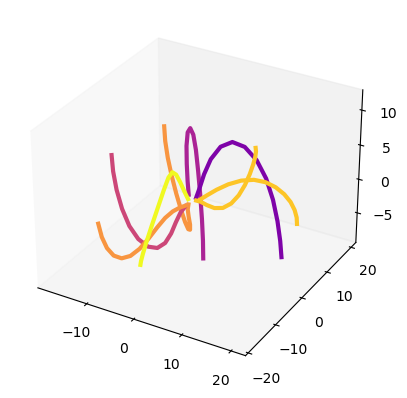

In [11]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')

for i in td_avg.index:
    ax.plot3D(*td_avg.loc[i,'MCx_pca'][5:-5,:].T, c = cmap((df.loc[i,'labels']+1)/8), linewidth=3)

ax.grid(False)



